In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dosya Okuma

In [2]:
oasis = pd.read_csv("oasis.csv")

In [76]:
print(oasis)

    Subject ID         MRI ID  Group  Visit  MR Delay  M/F  Hand  Age  EDUC  \
0    OAS2_0001  OAS2_0001_MR1      2      1         0    1     0   87    14   
1    OAS2_0001  OAS2_0001_MR2      2      2       457    1     0   88    14   
2    OAS2_0002  OAS2_0002_MR1      1      1         0    1     0   75    12   
3    OAS2_0002  OAS2_0002_MR2      1      2       560    1     0   76    12   
4    OAS2_0002  OAS2_0002_MR3      1      3      1895    1     0   80    12   
..         ...            ...    ...    ...       ...  ...   ...  ...   ...   
368  OAS2_0185  OAS2_0185_MR2      1      2       842    1     0   82    16   
369  OAS2_0185  OAS2_0185_MR3      1      3      2297    1     0   86    16   
370  OAS2_0186  OAS2_0186_MR1      2      1         0    0     0   61    13   
371  OAS2_0186  OAS2_0186_MR2      2      2       763    0     0   63    13   
372  OAS2_0186  OAS2_0186_MR3      2      3      1608    0     0   65    13   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
0    2.0 

In [3]:
oasis

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [4]:
### Group -------> Demented, Non-demented veya Converted sınıfları
### Visit -------> Hastanın Ziyaret Sayısı
### MR Delay ----> Delay Magnetic Resonance(MR) gecikmesi, görüntü alımı yapılmadan önce verilen gecikme süresi
### M/F ---------> Hastanın Cinsiyeti
### Age ---------> Hastanın Tarama Sırasındaki Yaşı
### EDUC --------> Hastanın Eğitim Hayatı(yıl)
### SES ---------> Hastanın Sosyo Ekonomik Durumu (1-5)
### MMSE --------> Mini Mental Durum Testi Puanı
### CDR ---------> Klinik Demans Derecelendirmesi
### eTIV --------> Deneysel Toplam Kafa İçi Hacmi
### nWBV --------> Normalize Edilmiş Tüm Beyin Hacmi
### ASF ---------> Atlas Ölçeklendirme Faktörü

### Parametre olarak alınmayanlar;
### Subject ID --> Hastanın kimlik numarası
### MR ID -------> Her hastanın MR kimlik numarası
### Hand --------> Sağ el yada Sol el kullanma alışkanlığı (tüm örnekler Sağ el kullanmaktadır)

############### Mini Mental Durum Testi Puanı ###############
###  MMSE      Demans Skoru                               ###
### 25-30 --> Sağlıklı (Demans Değil)                     ###
### 21-24 --> Erken aşama Alzheimer (Very Mild Alzheimer) ###
### 10-20 --> Orta aşama Alzheimer (Mild Alzheimer)       ###
###  0-10 --> İleri aşama (Modarate Alzheimer)            ###
#############################################################

############## Klinik Demans Derecelendirmesi ###############
### CDR      Demans Skoru                                 ###
###  0  --> Sağlıklı (Demans Değil)                       ###
### 0,5 --> Erken aşama Alzheimer (Very Mild Alzheimer)   ###
###  1  --> Orta aşama Alzheimer (Mild Alzheimer)         ###
###  2  --> İleri aşama (Modarate Alzheimer)              ###
###  3  --> Şiddetli (Son) aşama (Severe Alzheimer)       ###
#############################################################

# Veri Analizi

In [5]:
# Analiz
oasis.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


### Veri Farklılıkları

In [6]:
# Ne kadar farklı değer var
for i in list(oasis.columns):
    print(f"{i} -> {oasis[i].value_counts().shape[0]}")

Subject ID -> 150
MRI ID -> 373
Group -> 3
Visit -> 5
MR Delay -> 201
M/F -> 2
Hand -> 1
Age -> 39
EDUC -> 12
SES -> 5
MMSE -> 18
CDR -> 4
eTIV -> 286
nWBV -> 136
ASF -> 265


### Null Değerler

In [7]:
# Ne kadar null değer var
oasis.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

## Null İşlemler

In [77]:
oasis.head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,2,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,2,1,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,2,2,538,0,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,2,1,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,2,2,1010,1,0,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,2,3,1603,1,0,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [9]:
# null kayıtları dropla
oasis.dropna().head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [10]:
# null kayıtlara ortalama değer ver
oasis.fillna(value= {"SES": oasis["SES"].mean()}).head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.000000,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.000000,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.000000,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.000000,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.000000,30.0,0.0,1699,0.705,1.033


In [11]:
# Veri setindeki eksik değerleri kontrol etme
print("Eksik değerler:")
print(oasis.isnull().sum())

Eksik değerler:
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


## Aykırı Değerler

In [12]:
# Veri setini yükle
oasis = pd.read_csv("oasis.csv")

In [13]:
# Veri tiplerini kontrol et
print(oasis.dtypes)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


In [14]:
# Sayısal sütunları seç
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

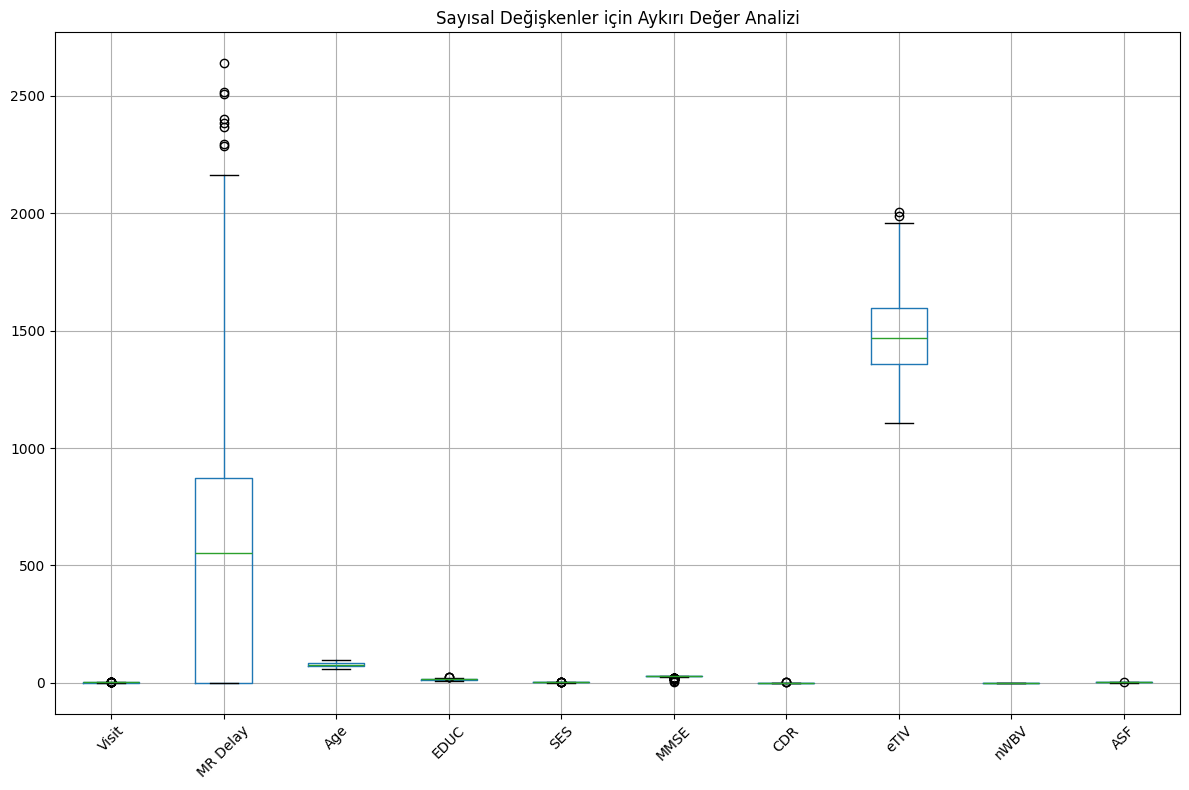

In [15]:
# Sayısal sütunlar için kutu grafiği oluşturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Sayısal Değişkenler için Aykırı Değer Analizi")
plt.tight_layout()
plt.show()

### Aykırı Değerler fixlenmeden önceki statlar

In [16]:
from sklearn.model_selection import train_test_split # train_test_split() kullanabilmek için
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Veri setini yükleme
oasis = pd.read_csv("oasis.csv")

# Kategorik değişkenleri encoding (Metin verileri sayısal verilere dönüştürme)
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])

# Etiketlerin sırasını yazdırma
print(le.classes_)
# 0 = Converted
# 1 = Demented
# 2 = Nondemented

oasis['M/F'] = le.fit_transform(oasis['M/F'])
oasis['Hand'] = le.fit_transform(oasis['Hand']) # Az Önemli Veri olduğundan zaten silinecektir



['Converted' 'Demented' 'Nondemented']


Model Doğruluğu (Accuracy): 0.8666666666666667

Karışıklık Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75



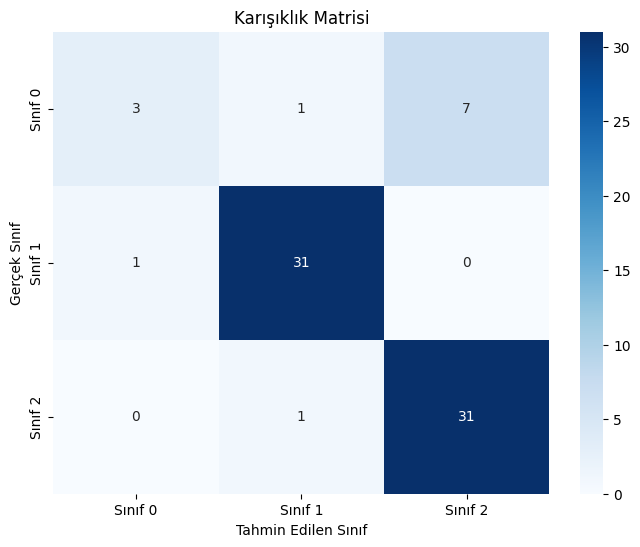

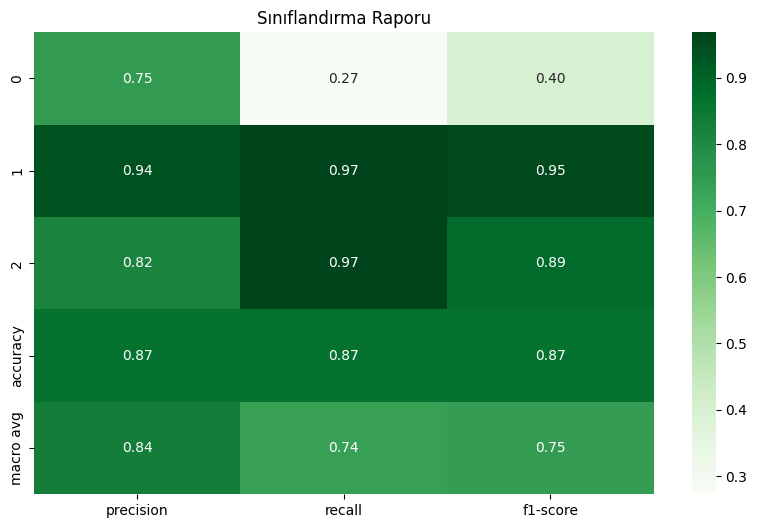

In [17]:
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)
y = oasis['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# Karışıklık Matrisi (Görselleştirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
# Sınıflandırma Raporu (Görselleştirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

Model Doğruluğu (Accuracy): 0.8933333333333333

Karışıklık Matrisi (Confusion Matrix):
 [[ 4  1  6]
 [ 0 32  0]
 [ 0  1 31]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.94      1.00      0.97        32
           2       0.84      0.97      0.90        32

    accuracy                           0.89        75
   macro avg       0.93      0.78      0.80        75
weighted avg       0.91      0.89      0.88        75



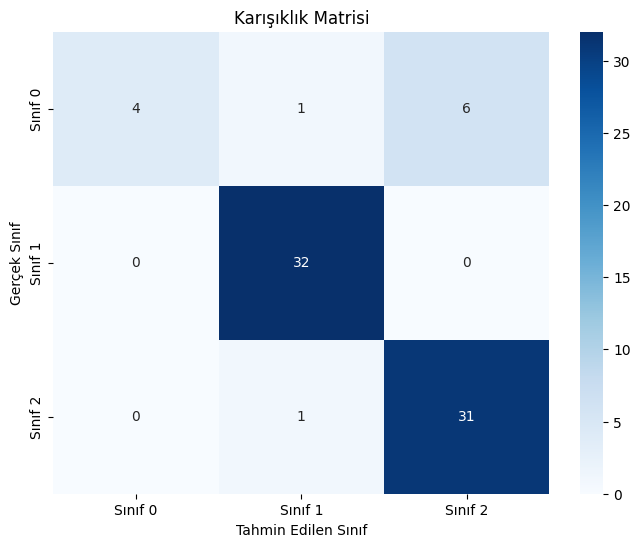

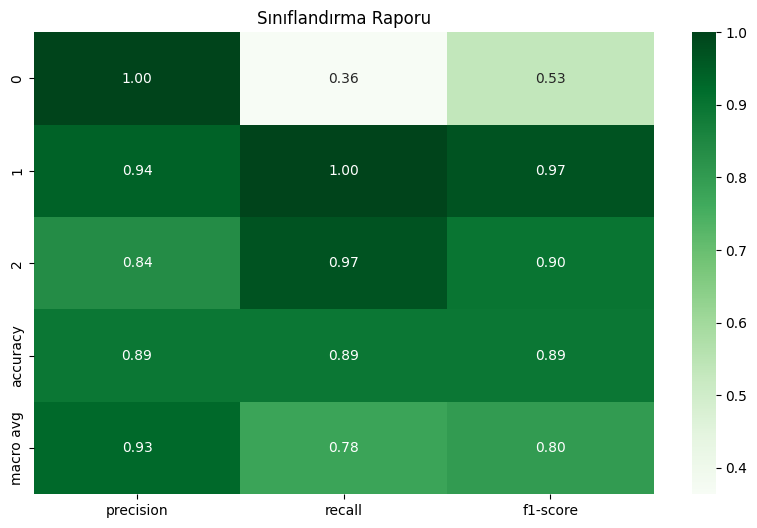

In [18]:
# Ekstra olarak 'M/F' değeri alınmayacak
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F'], axis=1)
y = oasis['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# Karışıklık Matrisi (Görselleştirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
# Sınıflandırma Raporu (Görselleştirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

## Aykırı Değer Fix

In [19]:
for col in numeric_columns:
    Q1 = oasis[col].quantile(0.25)
    Q3 = oasis[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Alt ve üst sınırları hesaplama
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Aykırı değerleri bulma
    outliers = oasis[(oasis[col] < lower_limit) | (oasis[col] > upper_limit)][col]
    
    if len(outliers) > 0:
        print(f"\n{col} sütunundaki aykırı değerler:")
        print(f"Alt sınır: {lower_limit:.2f}")
        print(f"Üst sınır: {upper_limit:.2f}")
        print(f"Aykırı değer sayısı: {len(outliers)}")
        print("Aykırı değerler:")
        print(outliers.head())

# Veri tiplerini görüntüleme
print("\nVeri seti sütunlarının tipleri:")
print(oasis.dtypes)


Visit sütunundaki aykırı değerler:
Alt sınır: -0.50
Üst sınır: 3.50
Aykırı değer sayısı: 21
Aykırı değerler:
12    4
31    4
32    5
35    4
50    4
Name: Visit, dtype: int64

MR Delay sütunundaki aykırı değerler:
Alt sınır: -1309.50
Üst sınır: 2182.50
Aykırı değer sayısı: 8
Aykırı değerler:
32     2400
71     2369
75     2508
153    2386
159    2288
Name: MR Delay, dtype: int64

EDUC sütunundaki aykırı değerler:
Alt sınır: 6.00
Üst sınır: 22.00
Aykırı değer sayısı: 3
Aykırı değerler:
107    23
108    23
109    23
Name: EDUC, dtype: int64

SES sütunundaki aykırı değerler:
Alt sınır: 0.50
Üst sınır: 4.50
Aykırı değer sayısı: 7
Aykırı değerler:
136    5.0
137    5.0
138    5.0
161    5.0
162    5.0
Name: SES, dtype: float64

MMSE sütunundaki aykırı değerler:
Alt sınır: 22.50
Üst sınır: 34.50
Aykırı değer sayısı: 42
Aykırı değerler:
4     22.0
25    21.0
26    16.0
43    21.0
44    21.0
Name: MMSE, dtype: float64

CDR sütunundaki aykırı değerler:
Alt sınır: -0.75
Üst sınır: 1.25
Aykırı d

In [20]:
for col in numeric_columns:
    Q1 = oasis[col].quantile(0.25)
    Q3 = oasis[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Alt ve üst sınırları hesaplama
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Aykırı değerleri sınırlar ile değiştirme
    oasis[col] = oasis[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
    
    print(f"\n{col} sütunundaki aykırı değerler düzeltildi.")
    print(f"Alt sınır: {lower_limit:.2f}")
    print(f"Üst sınır: {upper_limit:.2f}")

    """
    # Orijinal ve düzeltilmiş verileri görselleştirme
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=oasis[col])
    plt.title(f"{col} - Düzeltilmiş Veriler")
    
    plt.subplot(1, 2, 2)
    sns.histplot(oasis[col], kde=True, bins=20)
    plt.title(f"{col} - Histogram")
    
    plt.tight_layout()
    plt.show()
    """

# Veri setinin güncellenmiş hali
print("\nGüncellenmiş veri seti:")
print(oasis.head())


Visit sütunundaki aykırı değerler düzeltildi.
Alt sınır: -0.50
Üst sınır: 3.50

MR Delay sütunundaki aykırı değerler düzeltildi.
Alt sınır: -1309.50
Üst sınır: 2182.50

Age sütunundaki aykırı değerler düzeltildi.
Alt sınır: 54.50
Üst sınır: 98.50

EDUC sütunundaki aykırı değerler düzeltildi.
Alt sınır: 6.00
Üst sınır: 22.00

SES sütunundaki aykırı değerler düzeltildi.
Alt sınır: 0.50
Üst sınır: 4.50

MMSE sütunundaki aykırı değerler düzeltildi.
Alt sınır: 22.50
Üst sınır: 34.50

CDR sütunundaki aykırı değerler düzeltildi.
Alt sınır: -0.75
Üst sınır: 1.25

eTIV sütunundaki aykırı değerler düzeltildi.
Alt sınır: 997.00
Üst sınır: 1957.00

nWBV sütunundaki aykırı değerler düzeltildi.
Alt sınır: 0.62
Üst sınır: 0.84

ASF sütunundaki aykırı değerler düzeltildi.
Alt sınır: 0.81
Üst sınır: 1.58

Güncellenmiş veri seti:
  Subject ID         MRI ID  Group  Visit  MR Delay  M/F  Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1      2    1.0       0.0    1     0   87  14.0   
1  OAS2_0001  OAS2_00

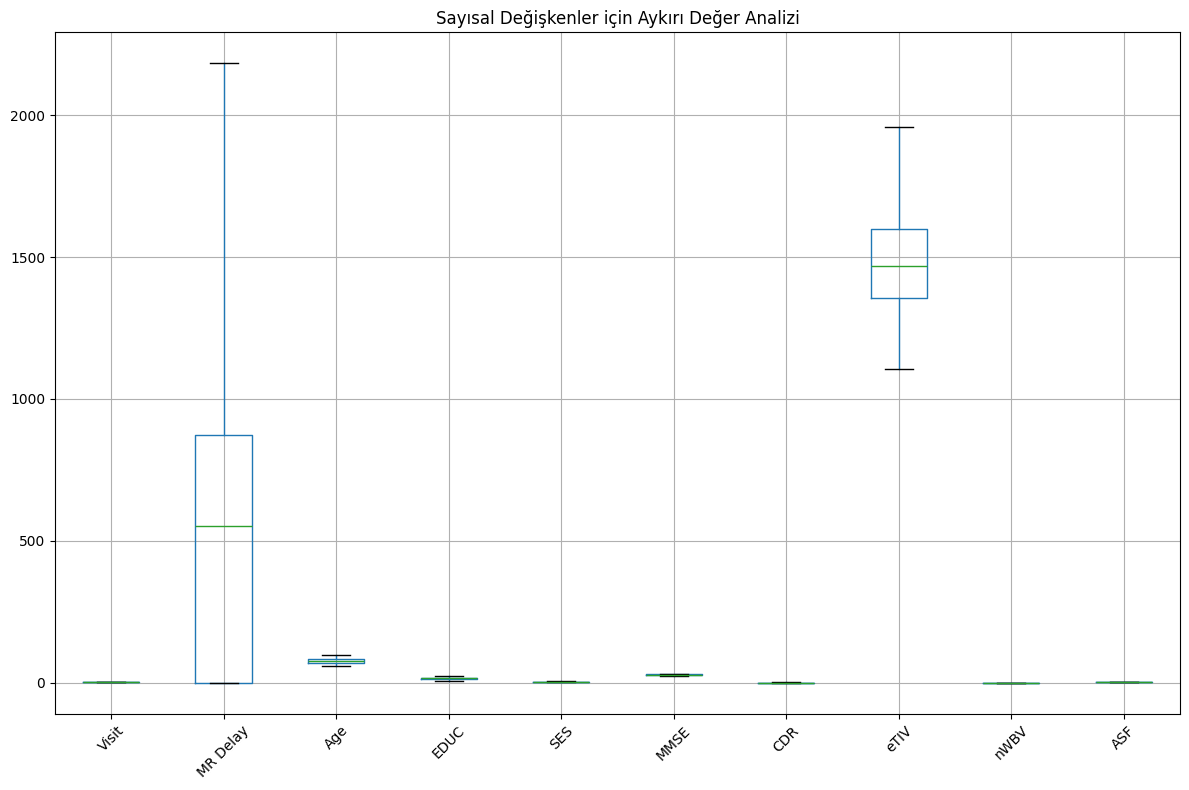

In [21]:
# Sayısal sütunlar için kutu grafiği oluşturma (Aykırı değerler giderildi)
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Sayısal Değişkenler için Aykırı Değer Analizi")
plt.tight_layout()
plt.show()

# Veri Görselleştirme

In [78]:
director_count = oasis["Group"].str.split(expand=True).stack().value_counts()
explode = [0,0,0.1]

plt.figure(figsize=(5,8))
plt.pie(director_count, labels=director_count.index, autopct="%1.1f%%", explode = explode)

plt.title("Gurup dağılımı")

AttributeError: Can only use .str accessor with string values!

### Histogram Tablosu

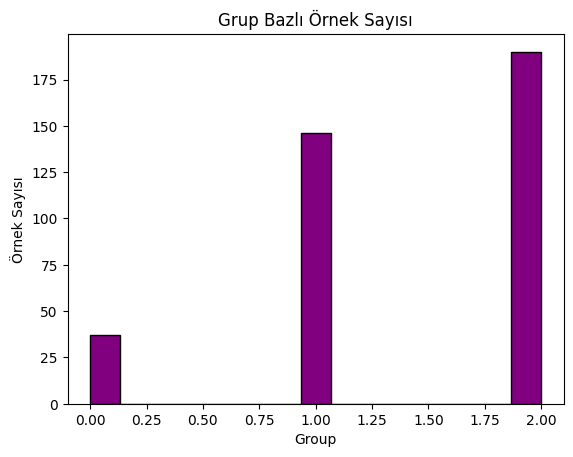

In [23]:
plt.hist(oasis["Group"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Group")
plt.ylabel("Örnek Sayısı")
plt.title( "Grup Bazlı Örnek Sayısı")
plt.show()

# plt.xticks(rotation = 0)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

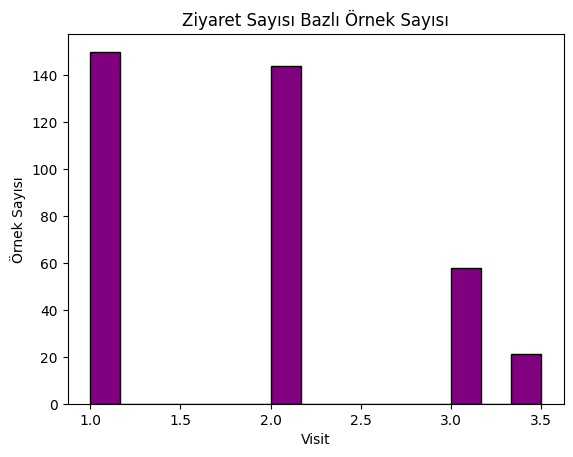

In [24]:
plt.hist(oasis["Visit"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Visit")
plt.ylabel("Örnek Sayısı")
plt.title( "Ziyaret Sayısı Bazlı Örnek Sayısı")
plt.show()

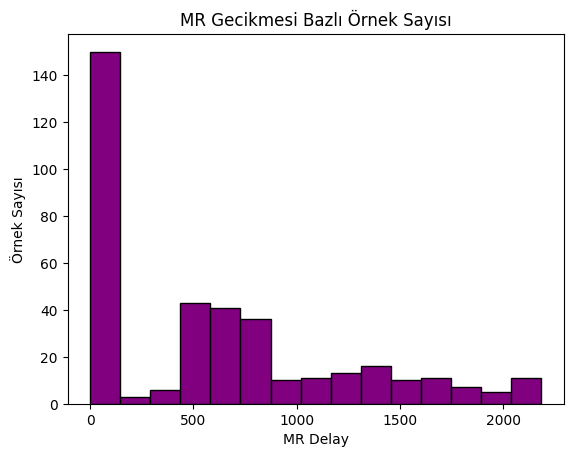

In [25]:
plt.hist(oasis["MR Delay"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("MR Delay")
plt.ylabel("Örnek Sayısı")
plt.title( "MR Gecikmesi Bazlı Örnek Sayısı")
plt.show()

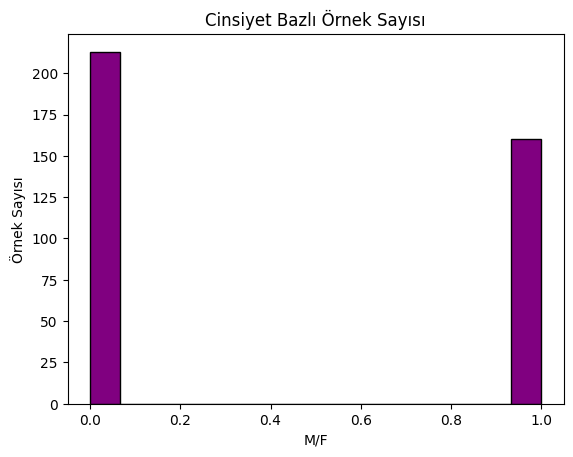

In [26]:
plt.hist(oasis["M/F"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("M/F")
plt.ylabel("Örnek Sayısı")
plt.title( "Cinsiyet Bazlı Örnek Sayısı")
plt.show()

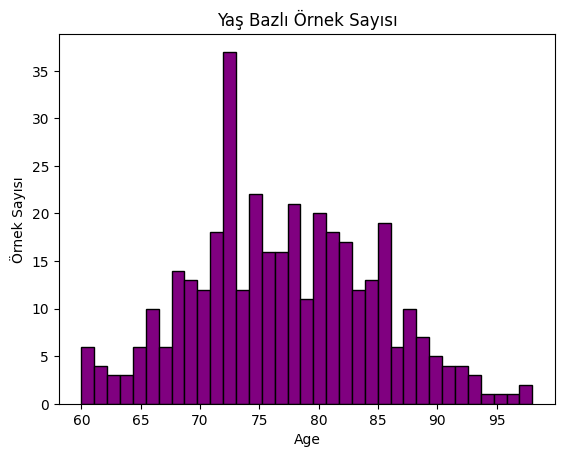

In [27]:
plt.hist(oasis["Age"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("Age")
plt.ylabel("Örnek Sayısı")
plt.title( "Yaş Bazlı Örnek Sayısı")
plt.show()

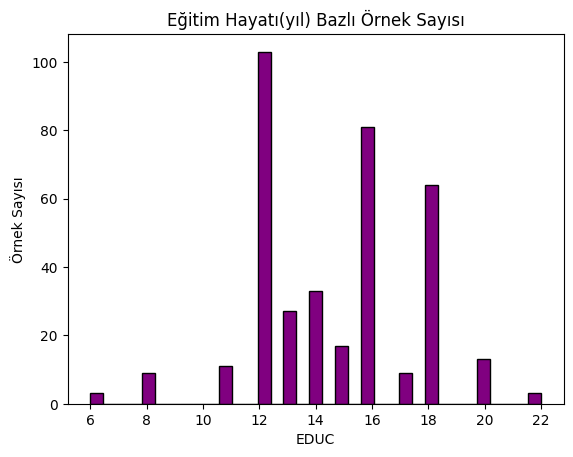

In [28]:
plt.hist(oasis["EDUC"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("EDUC")
plt.ylabel("Örnek Sayısı")
plt.title( "Eğitim Hayatı(yıl) Bazlı Örnek Sayısı")
plt.show()

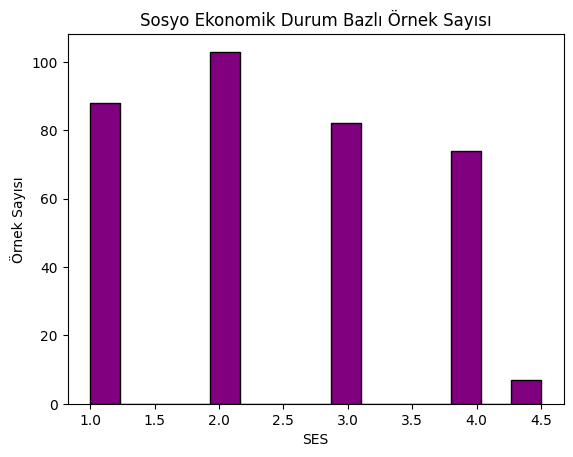

In [29]:
plt.hist(oasis["SES"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("SES")
plt.ylabel("Örnek Sayısı")
plt.title( "Sosyo Ekonomik Durum Bazlı Örnek Sayısı")
plt.show()

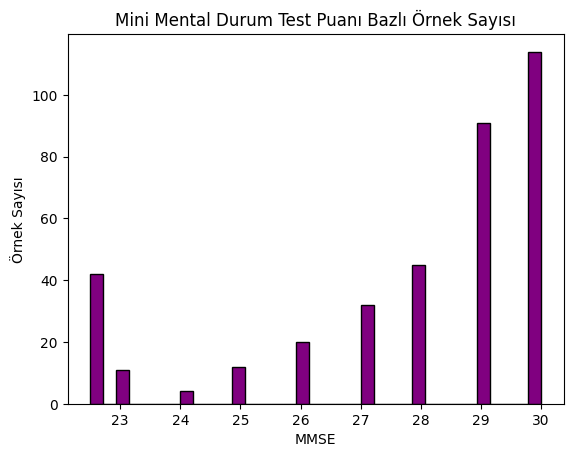

In [30]:
plt.hist(oasis["MMSE"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("MMSE")
plt.ylabel("Örnek Sayısı")
plt.title( "Mini Mental Durum Test Puanı Bazlı Örnek Sayısı")
plt.show()

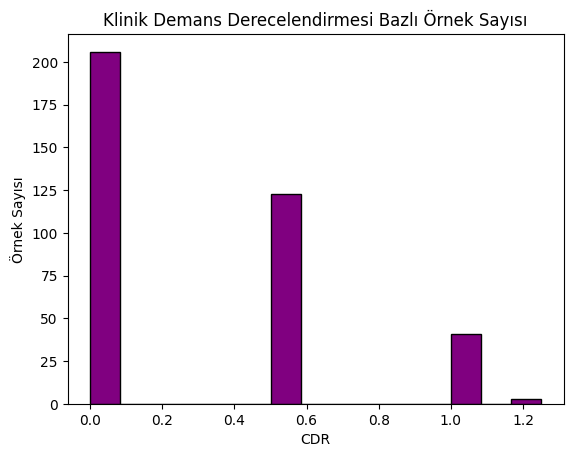

In [31]:
plt.hist(oasis["CDR"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("CDR")
plt.ylabel("Örnek Sayısı")
plt.title( "Klinik Demans Derecelendirmesi Bazlı Örnek Sayısı")
plt.show()

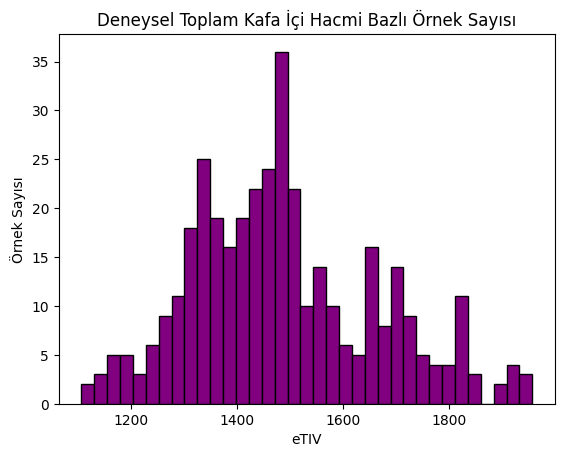

In [32]:
plt.hist(oasis["eTIV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("eTIV")
plt.ylabel("Örnek Sayısı")
plt.title( "Deneysel Toplam Kafa İçi Hacmi Bazlı Örnek Sayısı")
plt.show()

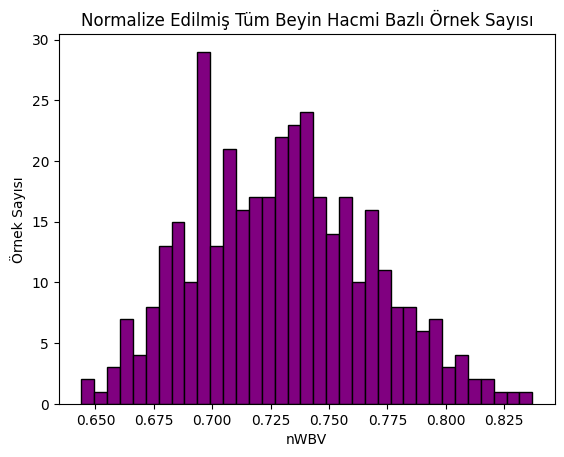

In [33]:
plt.hist(oasis["nWBV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("nWBV")
plt.ylabel("Örnek Sayısı")
plt.title( "Normalize Edilmiş Tüm Beyin Hacmi Bazlı Örnek Sayısı")
plt.show()

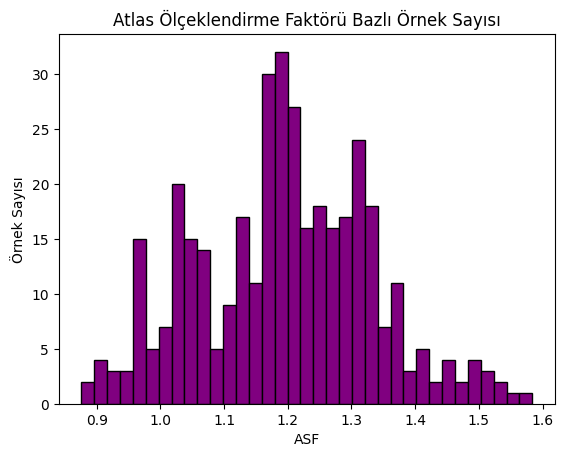

In [34]:
plt.hist(oasis["ASF"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("ASF")
plt.ylabel("Örnek Sayısı")
plt.title( "Atlas Ölçeklendirme Faktörü Bazlı Örnek Sayısı")
plt.show()

### Scatter Tablosu

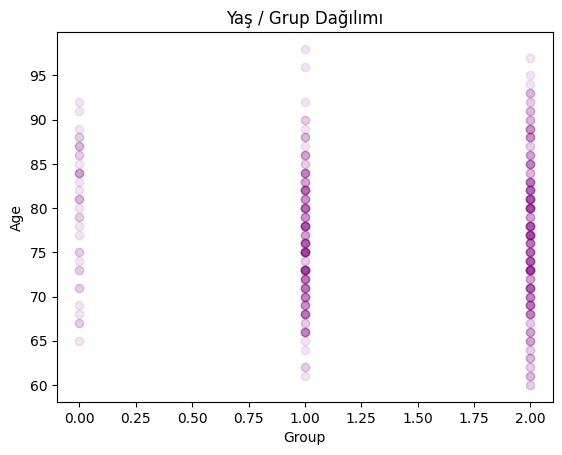

In [35]:
plt.scatter(oasis["Group"], oasis["Age"], color="purple", alpha= 0.1)
plt.title("Yaş / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('Age')
# plt.grid()
plt.show()

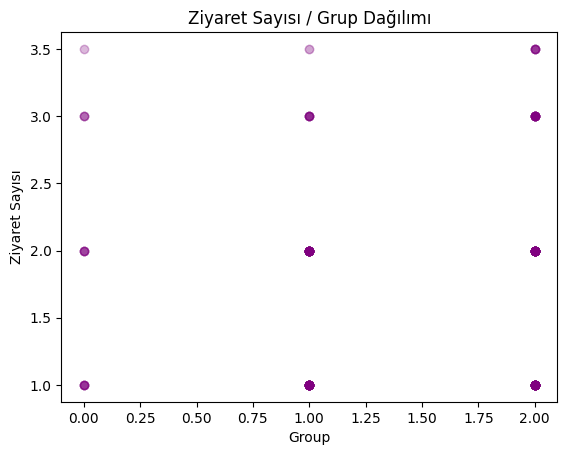

In [36]:
plt.scatter(oasis["Group"], oasis["Visit"], color="purple", alpha= 0.1)
plt.title("Ziyaret Sayısı / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('Ziyaret Sayısı')
plt.show()

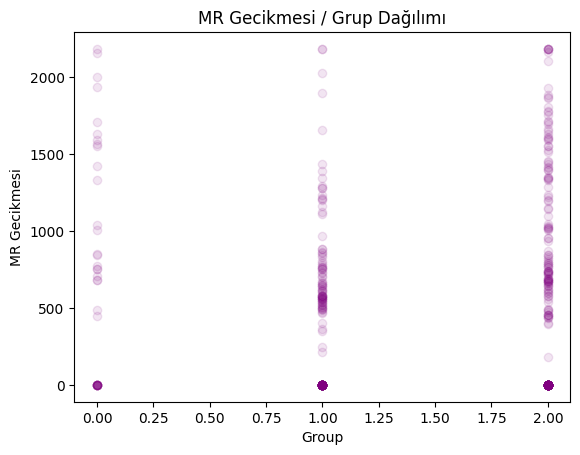

In [37]:
plt.scatter(oasis["Group"], oasis["MR Delay"], color="purple", alpha= 0.1)
plt.title("MR Gecikmesi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('MR Gecikmesi')
plt.show()

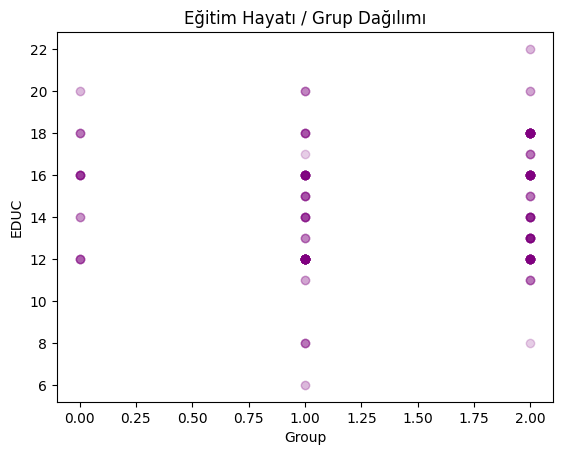

In [38]:
plt.scatter(oasis["Group"], oasis["EDUC"], color="purple", alpha= 0.1)
plt.title("Eğitim Hayatı / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('EDUC')
plt.show()

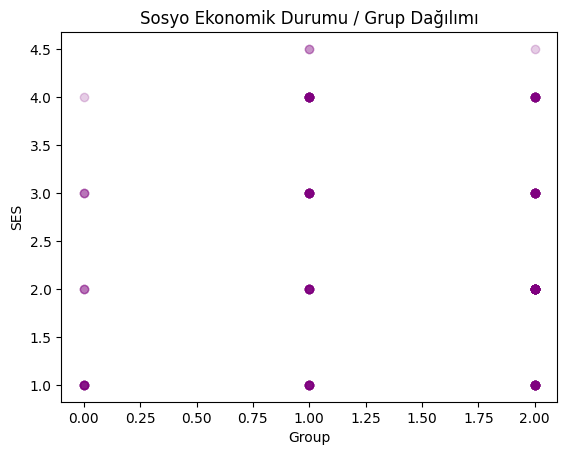

In [39]:
plt.scatter(oasis["Group"], oasis["SES"], color="purple", alpha= 0.1)
plt.title("Sosyo Ekonomik Durumu / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('SES')
plt.show()

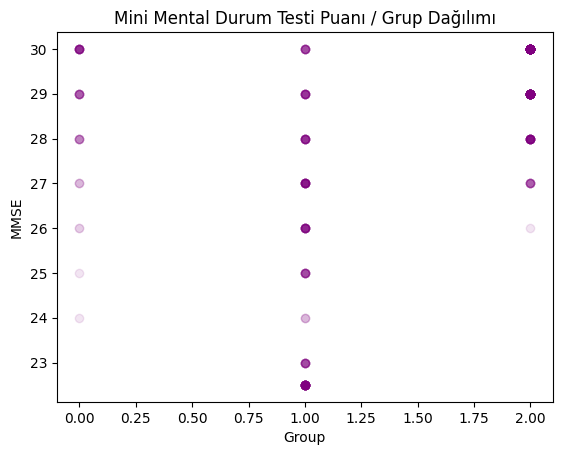

In [40]:
plt.scatter(oasis["Group"], oasis["MMSE"], color="purple", alpha= 0.1)
plt.title("Mini Mental Durum Testi Puanı / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('MMSE')
plt.show()

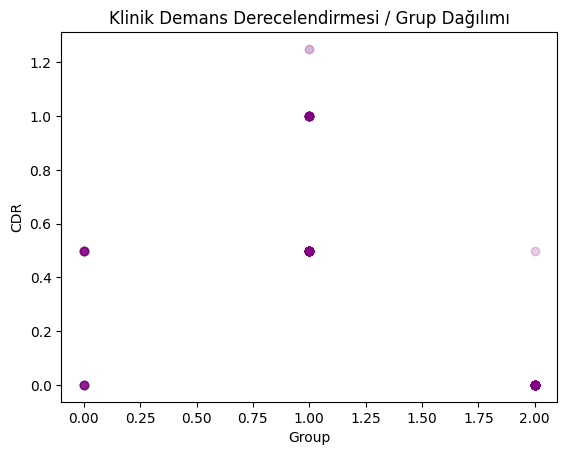

In [41]:
plt.scatter(oasis["Group"], oasis["CDR"], color="purple", alpha= 0.1)
plt.title("Klinik Demans Derecelendirmesi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('CDR')
plt.show()

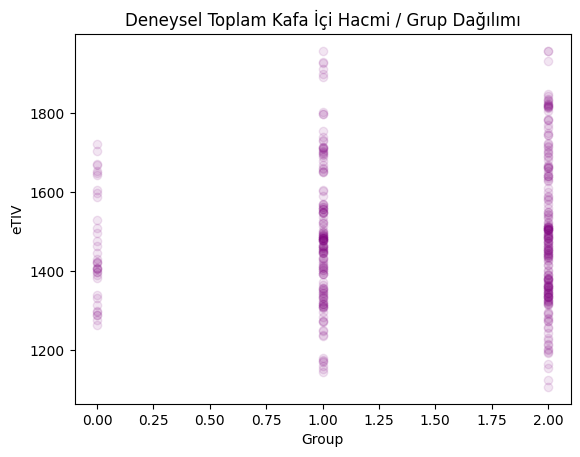

In [42]:
plt.scatter(oasis["Group"], oasis["eTIV"], color="purple", alpha= 0.1)
plt.title("Deneysel Toplam Kafa İçi Hacmi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('eTIV')
plt.show()

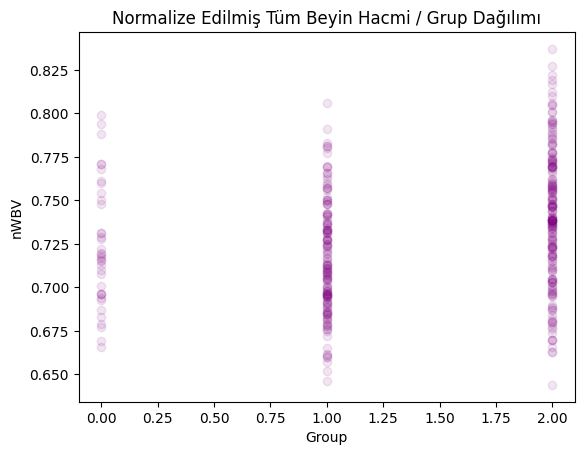

In [43]:
plt.scatter(oasis["Group"], oasis["nWBV"], color="purple", alpha= 0.1)
plt.title("Normalize Edilmiş Tüm Beyin Hacmi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('nWBV')
plt.show()

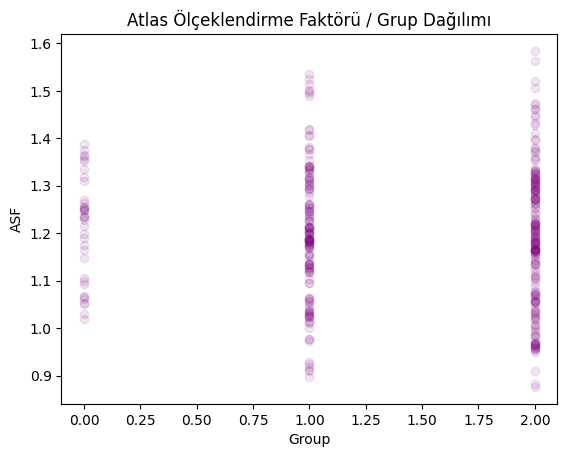

In [44]:
plt.scatter(oasis["Group"], oasis["ASF"], color="purple", alpha= 0.1)
plt.title("Atlas Ölçeklendirme Faktörü / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('ASF')
plt.show()

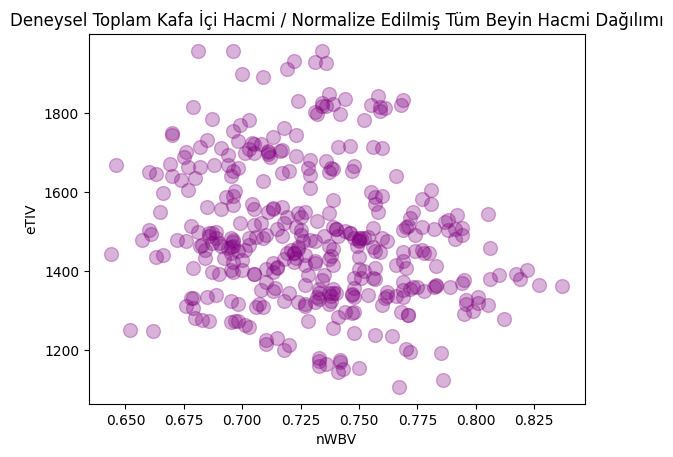

In [45]:
plt.scatter(oasis["nWBV"], oasis["eTIV"], color="purple", alpha= 0.3, s= 100)
plt.title("Deneysel Toplam Kafa İçi Hacmi / Normalize Edilmiş Tüm Beyin Hacmi Dağılımı")
plt.xlabel('nWBV')
plt.ylabel('eTIV')
plt.show()

# Makine Öğrenmesi

In [46]:
from sklearn.model_selection import train_test_split # train_test_split() kullanabilmek için
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# Veri setini yükleme
oasis = pd.read_csv("oasis.csv")

In [48]:
# Kategorik değişkenleri encoding (Metin verileri sayısal verilere dönüştürme)
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])

# Etiketlerin sırasını yazdırma
print(le.classes_)
# 0 = Converted
# 1 = Demented
# 2 = Nondemented

oasis['M/F'] = le.fit_transform(oasis['M/F'])
oasis['Hand'] = le.fit_transform(oasis['Hand']) # Az Önemli Veri olduğundan zaten silinecektir

['Converted' 'Demented' 'Nondemented']


In [49]:
print(oasis.columns)

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


In [50]:
# Bağımsız değişkenleri ve hedef değişkeni seçme
# Subject ID ve MRI ID önemli olmadığından çıkarıldı. Hand hep değerleri aynı olduğundan çıkarıldı
# Geriye kalan sütunlar X(Bağımsız Değişkenler) değişkene atandı
# axis=1: Sütunları hedef aldığını belirtir (satırları kaldırmak için axis=0 kullanılır)
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)
y = oasis['Group'] # Group stünu Y(Hedef Değişken) değişkenine atandı

In [51]:
# Veriyi %80 eğitim, %20 test olarak ayırma (test_size=0.2)
# X_train: Eğitim için kullanılacak bağımsız değişkenler.
# X_test : Test için kullanılacak bağımsız değişkenler.
# y_train: Eğitim için kullanılacak hedef değişken.
# y_test : Test için kullanılacak hedef değişken.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Random Forest modelini oluşturma ve eğitme

# Model Oluşturma
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
# Model Eğitme
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# test verileri (X_test) için sınıflandırma tahminleri yapma
y_pred = rf_classifier.predict(X_test)

In [54]:
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))

Model Doğruluğu (Accuracy): 0.8666666666666667

Karışıklık Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75



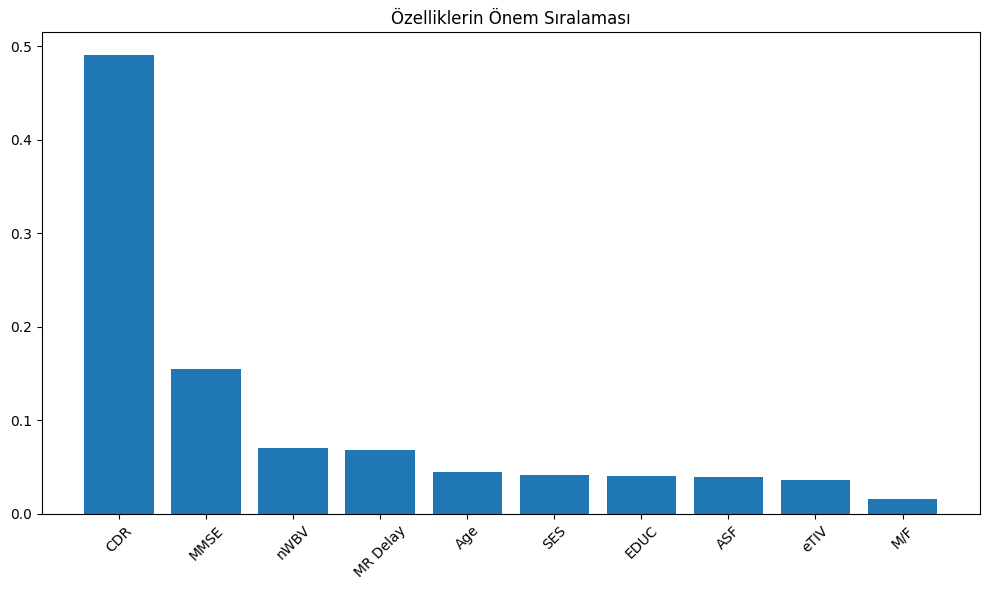

In [55]:
# Özellik önemini görselleştirme
plt.figure(figsize=(10, 6))
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importance)[::-1]

plt.title("Özelliklerin Önem Sıralaması")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

In [56]:
# Özellik önem tablosu
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)
print("\nÖzellik Önem Tablosu:\n", feature_importance_df)


Özellik Önem Tablosu:
     feature  importance
6       CDR    0.490143
5      MMSE    0.155002
8      nWBV    0.070220
0  MR Delay    0.068281
2       Age    0.044463
4       SES    0.041207
3      EDUC    0.040378
9       ASF    0.039282
7      eTIV    0.035582
1       M/F    0.015442


## Performans Değerlendirme

### Doğruluk Skoru

In [57]:
# Test verilerindeki doğru tahminlerin toplam tahminlere oranıdır (Doğru Tahmin Sayısı / Toplam Tahmin Sayısı)
accuracy = accuracy_score(y_test, y_pred)
print("Model Doğruluğu:", accuracy)

Model Doğruluğu: 0.8666666666666667


### Karışıklık Matrisi (Confusion Matrix)

In [58]:
# Bu matris, modelin tahminlerinin gerçek değerlerle nasıl uyuştuğunu gösterir.
# Satırlar: Gerçek sınıflar
# Sütunlar: Tahmin edilen sınıflar
cm = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:\n", cm)

Karışıklık Matrisi:
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]


#### Karışıklık Matrisinin Yorumu

In [59]:
# Gerçek Sınıf	  Tahmin Sınıf 0	  Tahmin Sınıf 1	  Tahmin Sınıf 2	  Toplam
#    0	            3 (doğru)	        1 (yanlış)	        7 (yanlış)	        11
#    1	            1 (yanlış)	       31 (doğru)	        0 (yanlış)	        32
#    2	            0 (yanlış)	        1 (yanlış)	       31 (doğru)	        32

#   Sınıf 0 Converted (11 örnek):
#      Model, sadece 3 tanesini doğru tahmin etmiş, 8'ini yanlış sınıflandırmış
#   Sınıf 1 Demented (32 örnek):
#      31 örneği doğru, sadece 1 tanesi yanlış
#   Sınıf 2 Nondemented (32 örnek):
#      31 örneği doğru, sadece 1 tanesi yanlış

#### Karışıklık Matrisini Görselleştirme

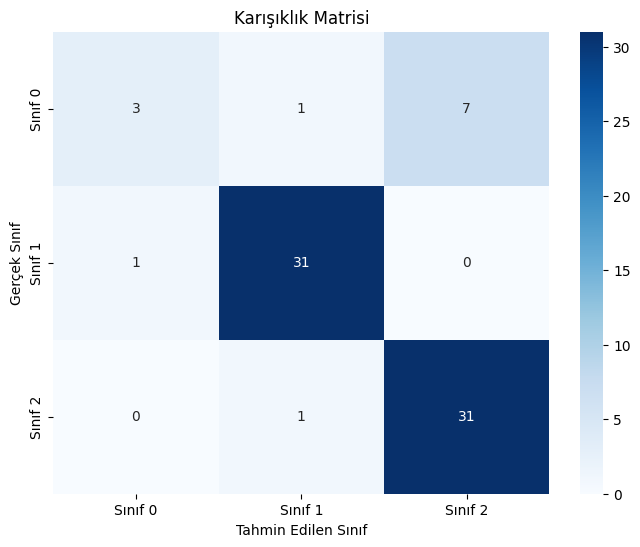

In [60]:
# Karışıklık Matrisini Hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık Matrisini Görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()

### Sınıflandırma Raporu

In [61]:
# Precision (Kesinlik): Tahmin edilen sınıfa ait örneklerin ne kadarının doğru olduğunu ölçer.
# Recall (Duyarlılık) : Gerçek sınıfa ait örneklerin ne kadarının doğru tahmin edildiğini ölçer.
# F1-Score            : Precision ve Recall'un harmonik ortalamasıdır.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75



#### Sınıflandırma Raporunun Yorumu

In [62]:
#   Sınıf 0 Converted:
#      Precision: 0.75 (Modelin "0" dediği örneklerin %75'i doğru)
#      Recall   : 0.27 (Gerçek "0" örneklerinin sadece %27'si doğru tahmin edilmiş)
#      F1-Score : 0.40 (Düşük performans)

#   Sınıf 1 Demented:
#      Precision: 0.94 (Modelin "1" dediği örneklerin %94'ü doğru)
#      Recall   : 0.97 (Gerçek "1" örneklerinin %97'si doğru tahmin edilmiş)
#      F1-Score : 0.95 (Çok iyi performans)

#   Sınıf 2 Nondemented:
#      Precision: 0.82 (Modelin "2" dediği örneklerin %82'si doğru)
#      Recall   : 0.97 (Gerçek "2" örneklerinin %97'si doğru tahmin edilmiş)
#      F1-Score : 0.89 (İyi performans)

#### Sınıflandırma Raporunu Görselleştirme

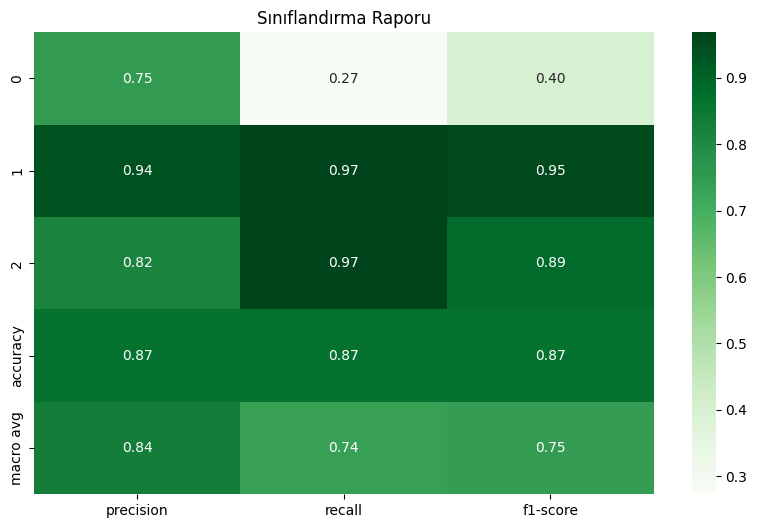

In [63]:
# Sınıflandırma Raporunu Al
report = classification_report(y_test, y_pred, output_dict=True)

# Raporu DataFrame'e Dönüştür
report_df = pd.DataFrame(report).transpose()

# Görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

# Advanced

In [64]:
# Özellik Önem Tablosu:

#        feature  importance
#   6       CDR    0.490143
#   5      MMSE    0.155002
#   8      nWBV    0.070220
#   0  MR Delay    0.068281
#   2       Age    0.044463
#   4       SES    0.041207
#   3      EDUC    0.040378
#   9       ASF    0.039282
#   7      eTIV    0.035582
#   1       M/F    0.015442

## CDR, MMSE, nWBV, MR Delay, Age, SES, EDUC, ASF, eTIV, M/F | acc : 0.8666666666666667

In [65]:
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)
y = oasis['Group']

Model Doğruluğu (Accuracy): 0.8666666666666667

Karışıklık Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75



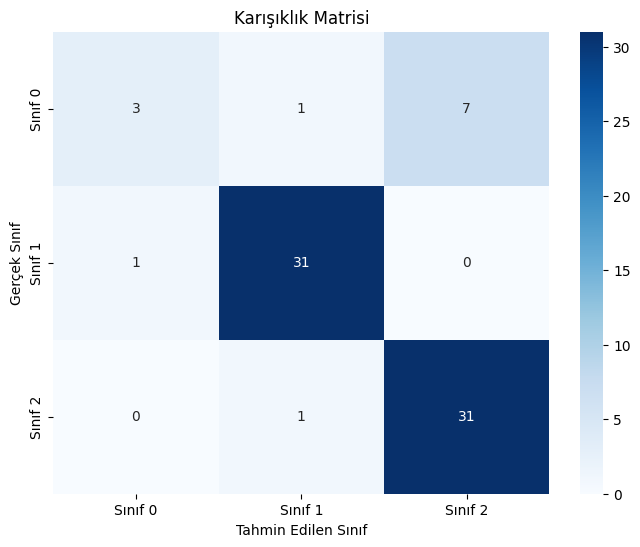

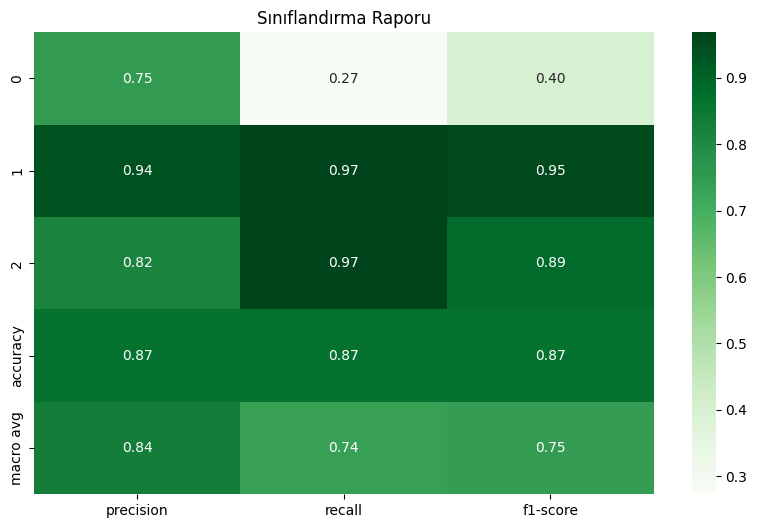

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# Karışıklık Matrisi (Görselleştirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
# Sınıflandırma Raporu (Görselleştirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

## CDR, MMSE, nWBV, MR Delay | acc : 0.84

In [67]:
# Ekstra olarak 'Age', 'SES', 'EDUC', 'ASF', 'eTIV', 'M/F' değerleri alınmayacak
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F', 'eTIV', 'ASF', 'EDUC', 'SES', 'Age'], axis=1)
y = oasis['Group']

Model Doğruluğu (Accuracy): 0.84

Karışıklık Matrisi (Confusion Matrix):
 [[ 4  1  6]
 [ 3 29  0]
 [ 1  1 30]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.94      0.91      0.92        32
           2       0.83      0.94      0.88        32

    accuracy                           0.84        75
   macro avg       0.76      0.74      0.74        75
weighted avg       0.83      0.84      0.83        75



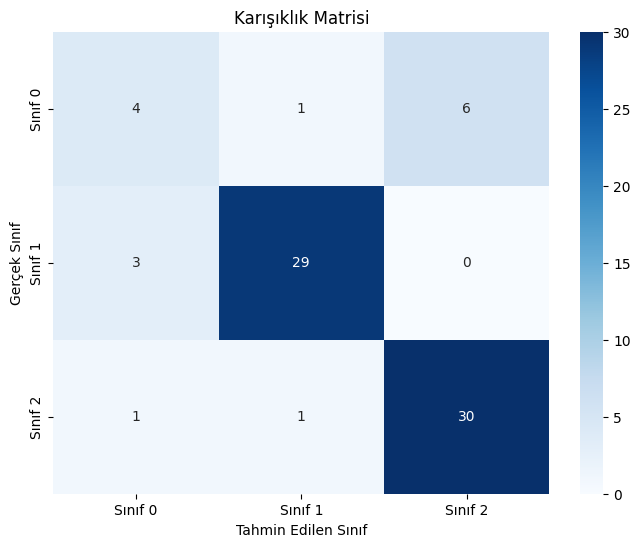

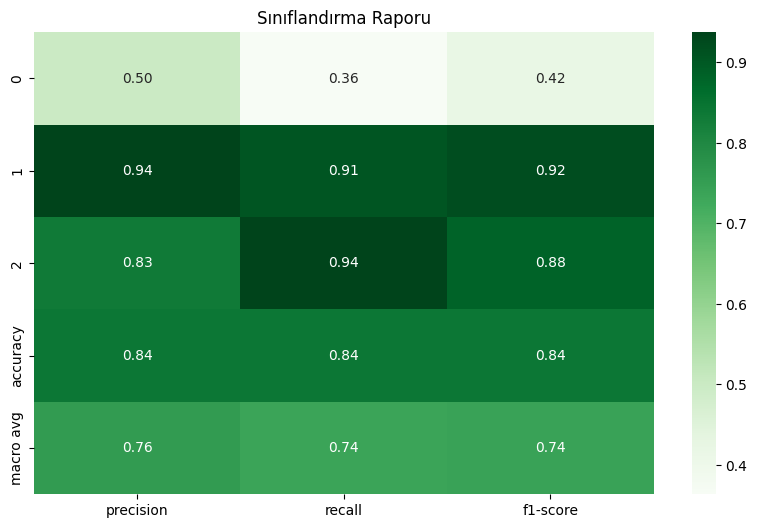

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# Karışıklık Matrisi (Görselleştirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
# Sınıflandırma Raporu (Görselleştirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

## CDR, MMSE, nWBV, MR Delay, Age, SES, EDUC, ASF, eTIV | acc : 0.8933333333333333

In [69]:
# Ekstra olarak 'M/F' değeri alınmayacak
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F'], axis=1)
y = oasis['Group']

Model Doğruluğu (Accuracy): 0.88

Karışıklık Matrisi (Confusion Matrix):
 [[ 4  1  6]
 [ 1 31  0]
 [ 0  1 31]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.94      0.97      0.95        32
           2       0.84      0.97      0.90        32

    accuracy                           0.88        75
   macro avg       0.86      0.77      0.78        75
weighted avg       0.88      0.88      0.86        75



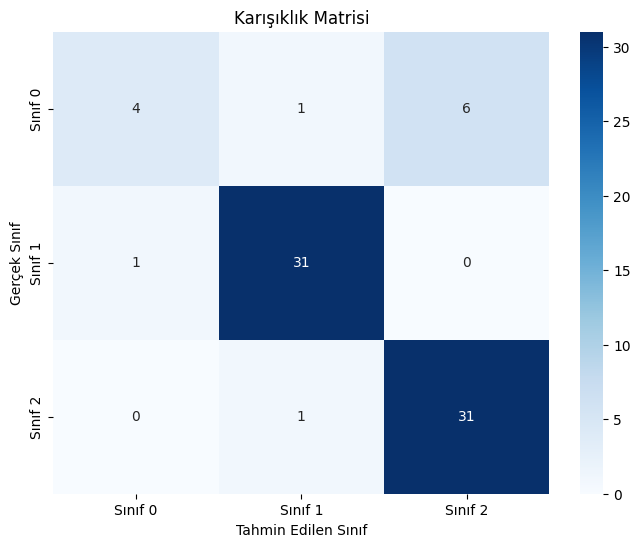

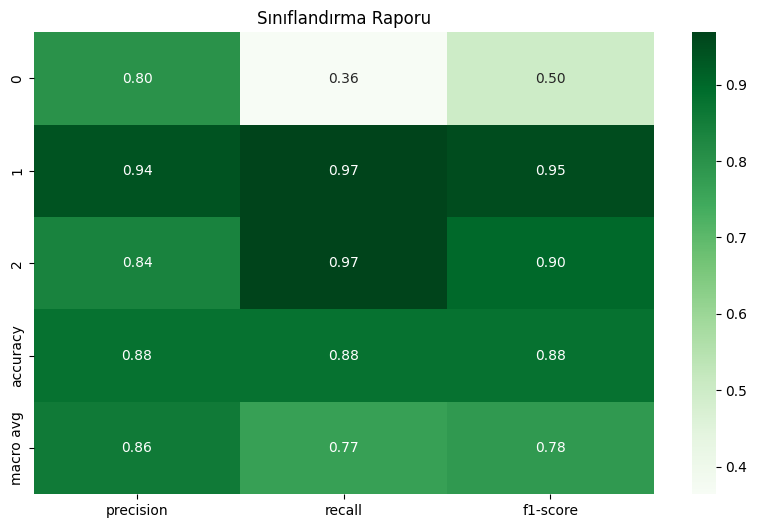

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# Karışıklık Matrisi (Görselleştirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
# Sınıflandırma Raporu (Görselleştirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

# Normalizasyon

In [71]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Veri setini okuma
oasis = pd.read_csv("oasis.csv")

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])
oasis['M/F'] = le.fit_transform(oasis['M/F'])
oasis['Hand'] = le.fit_transform(oasis['Hand'])

# Özellik ve hedef değişkenleri ayırma
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F'], axis=1)
y = oasis['Group']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Min-Max Normalizasyon
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Min-Max normalize edilmiş veri ile model eğitimi
rf_classifier_minmax = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = rf_classifier_minmax.predict(X_test_minmax)

# Min-Max normalizasyon sonuçları
minmax_accuracy = accuracy_score(y_test, y_pred_minmax)
print("\nMin-Max Normalizasyon Sonuçları:")
print(f"Model Doğruluğu (Accuracy): {minmax_accuracy}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_minmax))

# 2. Standart Normalizasyon
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# Standart normalize edilmiş veri ile model eğitimi
rf_classifier_standard = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_standard.fit(X_train_standard, y_train)
y_pred_standard = rf_classifier_standard.predict(X_test_standard)

# Standart normalizasyon sonuçları
standard_accuracy = accuracy_score(y_test, y_pred_standard)
print("\nStandart Normalizasyon Sonuçları:")
print(f"Model Doğruluğu (Accuracy): {standard_accuracy}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_standard))


Min-Max Normalizasyon Sonuçları:
Model Doğruluğu (Accuracy): 0.8933333333333333

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.94      1.00      0.97        32
           2       0.84      0.97      0.90        32

    accuracy                           0.89        75
   macro avg       0.93      0.78      0.80        75
weighted avg       0.91      0.89      0.88        75


Standart Normalizasyon Sonuçları:
Model Doğruluğu (Accuracy): 0.8933333333333333

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.94      1.00      0.97        32
           2       0.84      0.97      0.90        32

    accuracy                           0.89        75
   macro avg       0.93      0.78      0.80        75
weighted avg       0.91      0.89      0.88        75



# SVM'da Normalizasyon

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Veri setini okuma
oasis = pd.read_csv("oasis.csv")

# Veri setindeki eksik değerleri kontrol etme
print("Eksik değerler:")
print(oasis.isnull().sum())

# Sonsuz değerleri kontrol etme
print("\nSonsuz değerler:")
print(np.isinf(oasis.select_dtypes(include=np.number).values).sum())

# Eksik değerleri medyan ile doldurma
numeric_columns = oasis.select_dtypes(include=np.number).columns
oasis[numeric_columns] = oasis[numeric_columns].fillna(oasis[numeric_columns].median())

# Sonsuz değerleri NaN'a çevirip medyan ile doldurma
oasis = oasis.replace([np.inf, -np.inf], np.nan)
oasis[numeric_columns] = oasis[numeric_columns].fillna(oasis[numeric_columns].median())

# Kategorik değişkenleri sayısala çevirme
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])
oasis['M/F'] = le.fit_transform(oasis['M/F'])
oasis['Hand'] = le.fit_transform(oasis['Hand'])

# Özellik ve hedef değişkenleri ayırma
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F'], axis=1)
y = oasis['Group']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri setinin boyutlarını kontrol etme
print("\nEğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

try:
    # Normalizasyon olmadan SVM
    print("\nNormalizasyon Olmadan:")
    svm_classifier = SVC(random_state=42)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    print(f"Doğruluk: {accuracy_score(y_test, y_pred)}")

    # Normalizasyon ile SVM
    print("\nNormalizasyon İle:")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svm_classifier_scaled = SVC(random_state=42)
    svm_classifier_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = svm_classifier_scaled.predict(X_test_scaled)
    print(f"Doğruluk: {accuracy_score(y_test, y_pred_scaled)}")

except ValueError as e:
    print("\nHata:", e)
    print("\nVeri setinin ilk birkaç satırı:")
    print(X_train.head())
    print("\nVeri tipleri:")
    print(X_train.dtypes)

Eksik değerler:
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Sonsuz değerler:
0

Eğitim seti boyutu: (298, 9)
Test seti boyutu: (75, 9)

Normalizasyon Olmadan:
Doğruluk: 0.4266666666666667

Normalizasyon İle:
Doğruluk: 0.8533333333333334


# 2. Dönem

In [74]:
from imblearn import over_sampling # dengesiz veri %20'nin altındaysa bu daha mantıklı oluyor

In [81]:
from imblearn.over_sampling import RandomOverSampler

In [83]:
print(oasis)

    Subject ID         MRI ID  Group  Visit  MR Delay  M/F  Hand  Age  EDUC  \
0    OAS2_0001  OAS2_0001_MR1      2      1         0    1     0   87    14   
1    OAS2_0001  OAS2_0001_MR2      2      2       457    1     0   88    14   
2    OAS2_0002  OAS2_0002_MR1      1      1         0    1     0   75    12   
3    OAS2_0002  OAS2_0002_MR2      1      2       560    1     0   76    12   
4    OAS2_0002  OAS2_0002_MR3      1      3      1895    1     0   80    12   
..         ...            ...    ...    ...       ...  ...   ...  ...   ...   
368  OAS2_0185  OAS2_0185_MR2      1      2       842    1     0   82    16   
369  OAS2_0185  OAS2_0185_MR3      1      3      2297    1     0   86    16   
370  OAS2_0186  OAS2_0186_MR1      2      1         0    0     0   61    13   
371  OAS2_0186  OAS2_0186_MR2      2      2       763    0     0   63    13   
372  OAS2_0186  OAS2_0186_MR3      2      3      1608    0     0   65    13   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
0    2.0 

In [88]:
over_sampling.RandomOverSampler()

RandomOverSampler()

In [120]:
print(X_train.shape) # .shape boyutunu görmek için
print(X_train)

(298, 9)
     MR Delay  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
192         0   75    12  4.0  28.0  0.0  1511  0.739  1.162
75       2508   89    12  4.0  26.0  0.5  1485  0.706  1.181
84          0   70    17  3.0  29.0  0.0  1640  0.766  1.070
361         0   66    13  2.0  30.0  0.0  1495  0.746  1.174
16        576   69    12  2.0  24.0  0.5  1480  0.791  1.186
..        ...  ...   ...  ...   ...  ...   ...    ...    ...
71       2369   75    13  4.0  29.0  0.0  1349  0.778  1.301
106       538   72    12  4.0  17.0  1.0  1483  0.695  1.184
270      1591   82    18  1.0  29.0  0.0  1442  0.644  1.217
348      1631   89    16  2.0  30.0  0.5  1408  0.679  1.246
102         0   69    16  3.0  30.0  0.0  1491  0.794  1.177

[298 rows x 9 columns]


In [108]:
ros = over_sampling.RandomOverSampler()
RosX_train, RosY_train = ros.fit_resample(X_train, y_train)

In [121]:
print(RosX_train.shape)
print(RosX_train)

(474, 9)
     MR Delay  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0           0   75    12  4.0  28.0  0.0  1511  0.739  1.162
1        2508   89    12  4.0  26.0  0.5  1485  0.706  1.181
2           0   70    17  3.0  29.0  0.0  1640  0.766  1.070
3           0   66    13  2.0  30.0  0.0  1495  0.746  1.174
4         576   69    12  2.0  24.0  0.5  1480  0.791  1.186
..        ...  ...   ...  ...   ...  ...   ...    ...    ...
469         0   70    12  2.0  29.0  0.5  1432  0.692  1.225
470       518   75    12  3.0  27.0  1.0  1357  0.714  1.293
471       403   68    16  1.0  29.0  0.5  1344  0.733  1.305
472         0   78     8  5.0  23.0  1.0  1462  0.691  1.200
473      1655   81    16  3.0  25.0  0.5  1396  0.687  1.257

[474 rows x 9 columns]


In [110]:
smote = over_sampling.SMOTE()
SmoteX_train, SmoteY_train = smote.fit_resample(X_train, y_train)

In [122]:
print(SmoteX_train.shape)
print(SmoteX_train)

(474, 9)
     MR Delay  Age  EDUC       SES       MMSE       CDR  eTIV      nWBV  \
0           0   75    12  4.000000  28.000000  0.000000  1511  0.739000   
1        2508   89    12  4.000000  26.000000  0.500000  1485  0.706000   
2           0   70    17  3.000000  29.000000  0.000000  1640  0.766000   
3           0   66    13  2.000000  30.000000  0.000000  1495  0.746000   
4         576   69    12  2.000000  24.000000  0.500000  1480  0.791000   
..        ...  ...   ...       ...        ...       ...   ...       ...   
469       552   76    12  2.345433  27.000000  1.000000  1325  0.710727   
470       578   69    12  2.569450  21.722199  0.642363  1483  0.772208   
471       493   73    14  2.338000  27.662000  0.500000  1506  0.722196   
472       622   70    18  1.707979  22.460104  0.853990  1560  0.709407   
473         0   74    12  2.000000  23.036707  0.500000  1677  0.736022   

          ASF  
0    1.162000  
1    1.181000  
2    1.070000  
3    1.174000  
4    1.186

In [112]:
adasyn = over_sampling.ADASYN()
AdasynX_train, AdasynY_train = adasyn.fit_resample(X_train, y_train)

In [123]:
print(AdasynX_train.shape)
print(AdasynX_train)

(463, 9)
     MR Delay  Age  EDUC       SES       MMSE       CDR  eTIV      nWBV  \
0           0   75    12  4.000000  28.000000  0.000000  1511  0.739000   
1        2508   89    12  4.000000  26.000000  0.500000  1485  0.706000   
2           0   70    17  3.000000  29.000000  0.000000  1640  0.766000   
3           0   66    13  2.000000  30.000000  0.000000  1495  0.746000   
4         576   69    12  2.000000  24.000000  0.500000  1480  0.791000   
..        ...  ...   ...       ...        ...       ...   ...       ...   
458      1253   79    12  2.717826  25.564348  0.820544  1363  0.711077   
459         0   71    12  2.599087  30.000000  0.500000  1440  0.756171   
460         0   66    12  2.884529  29.884529  0.500000  1445  0.760109   
461       706   87     9  4.000000  23.685435  0.500000  1685  0.657789   
462         0   72    16  3.209519  26.526988  0.500000  1771  0.733832   

          ASF  
0    1.162000  
1    1.181000  
2    1.070000  
3    1.174000  
4    1.186

## Smote

In [128]:
from imblearn.over_sampling import SMOTE

# SMOTE ile dengeleme
smote = SMOTE()
SmoteX_train, SmoteY_train = smote.fit_resample(X_train, y_train)

# Dengelenmiş verilerin boyutlarını yazdır
print(SmoteX_train.shape)
print(SmoteX_train)


(456, 9)
     MR Delay  Age  EDUC       SES       MMSE       CDR  eTIV      nWBV  \
0           0   68    12  2.000000  27.000000  0.500000  1457  0.806000   
1           0   70    16  1.000000  25.000000  0.500000  1568  0.696000   
2        1435   73    12  4.000000  16.000000  1.000000  1478  0.696000   
3        1282   82     8  5.000000  18.000000  0.500000  1464  0.682000   
4         756   82    20  1.000000  28.000000  0.500000  1606  0.677000   
..        ...  ...   ...       ...        ...       ...   ...       ...   
451       531   81    15  1.944562  19.944562  1.000000  1728  0.697612   
452       766   79    14  3.000000  28.852024  0.500000  1329  0.694630   
453      1263   76    15  2.225372  27.225372  0.943657  1384  0.710789   
454         0   65    17  1.746289  22.761133  0.500000  1552  0.726598   
455       790   77    15  2.898427  26.085840  0.550787  1401  0.686648   

          ASF  
0    1.205000  
1    1.119000  
2    1.188000  
3    1.199000  
4    1.093

Model Doğruluğu (Accuracy): 0.9239130434782609

Karışıklık Matrisi (Confusion Matrix):
 [[23  1  5]
 [ 1 36  0]
 [ 0  0 26]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        29
           1       0.97      0.97      0.97        37
           2       0.84      1.00      0.91        26

    accuracy                           0.92        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.93      0.92      0.92        92



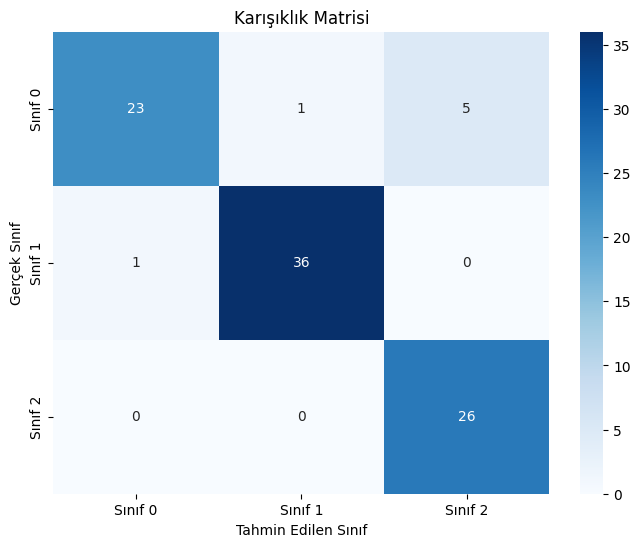

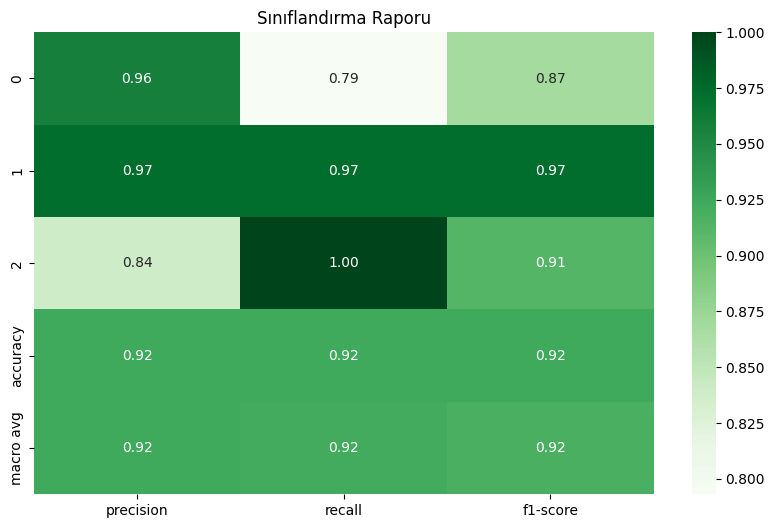

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Eğitim ve test verilerine bölelim (SMOTE uygulandıktan sonra X_train, y_train değiştirildi)
X_train, X_test, y_train, y_test = train_test_split(SmoteX_train, SmoteY_train, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma ve eğitme
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = rf_classifier.predict(X_test)

# Model doğruluğu
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))

# Karışıklık Matrisi (Confusion Matrix)
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))

# Sınıflandırma Raporu (Classification Report)
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))

# Karışıklık Matrisi Görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()

# Sınıflandırma Raporu Görselleştirme
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

Model Doğruluğu (Accuracy): 0.9239130434782609

Karışıklık Matrisi (Confusion Matrix):
 [[23  1  5]
 [ 1 36  0]
 [ 0  0 26]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        29
           1       0.97      0.97      0.97        37
           2       0.84      1.00      0.91        26

    accuracy                           0.92        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.93      0.92      0.92        92



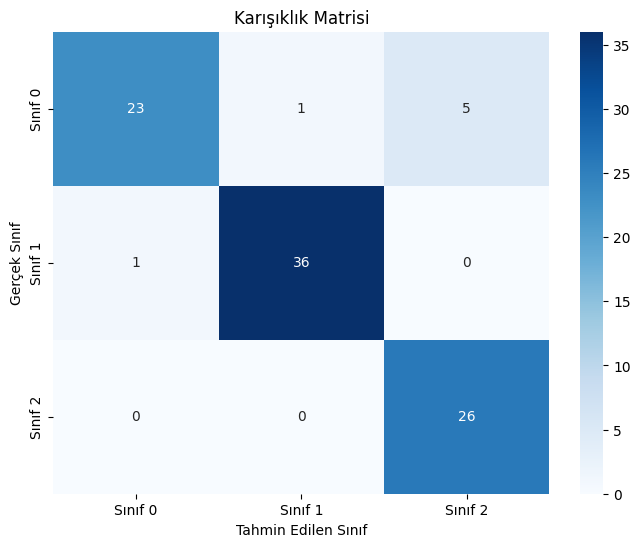

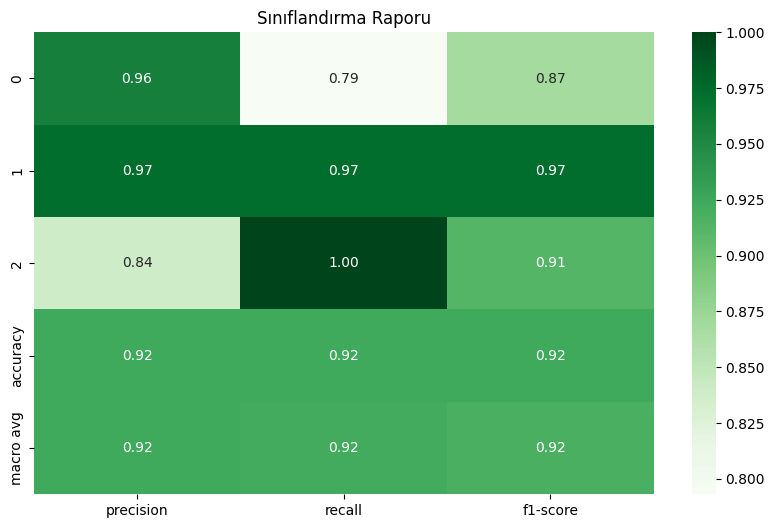

In [131]:
X_train, X_test, y_train, y_test = train_test_split(SmoteX_train, SmoteY_train, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

Model Doğruluğu (Accuracy): 0.9456521739130435

Karışıklık Matrisi (Confusion Matrix):
 [[29  1  2]
 [ 1 32  0]
 [ 0  1 26]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.94      0.97      0.96        33
           2       0.93      0.96      0.95        27

    accuracy                           0.95        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



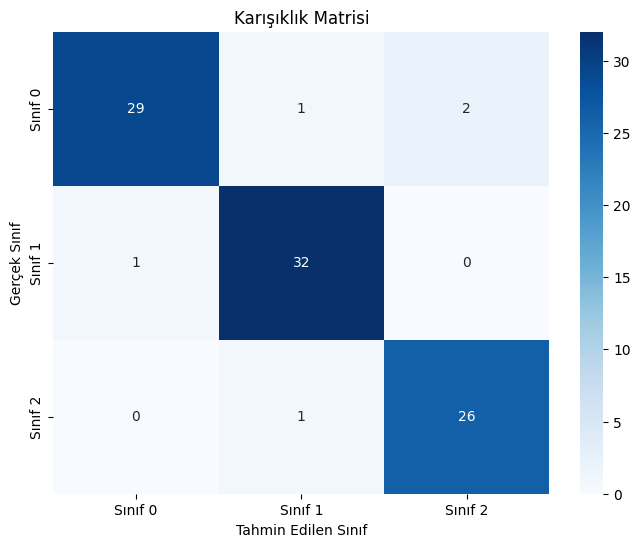

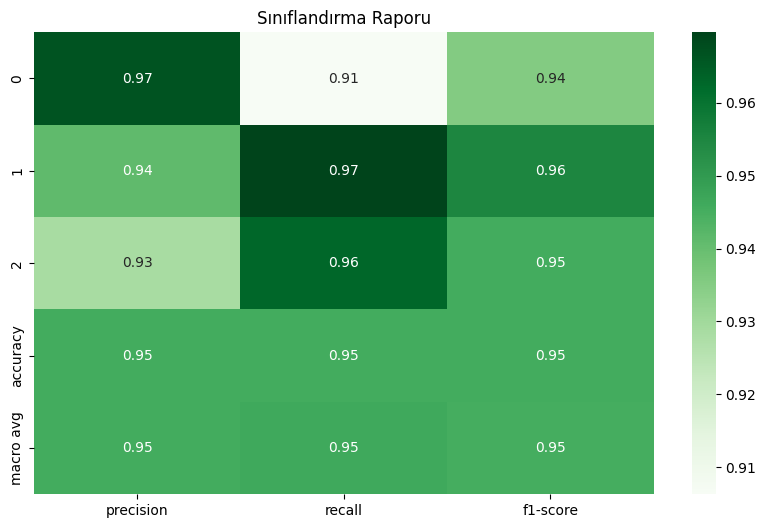

In [132]:
X_train, X_test, y_train, y_test = train_test_split(SmoteX_train, SmoteY_train, test_size=0.2, random_state=7)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

Model Doğruluğu (Accuracy): 0.9891304347826086

Karışıklık Matrisi (Confusion Matrix):
 [[30  0  1]
 [ 0 29  0]
 [ 0  0 32]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       1.00      1.00      1.00        29
           2       0.97      1.00      0.98        32

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



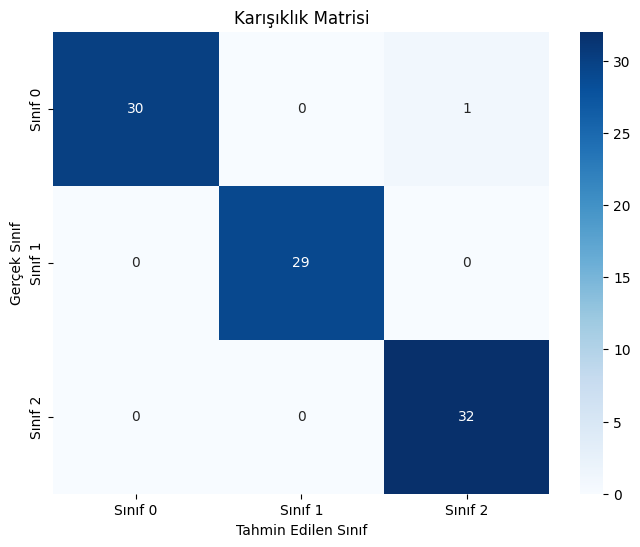

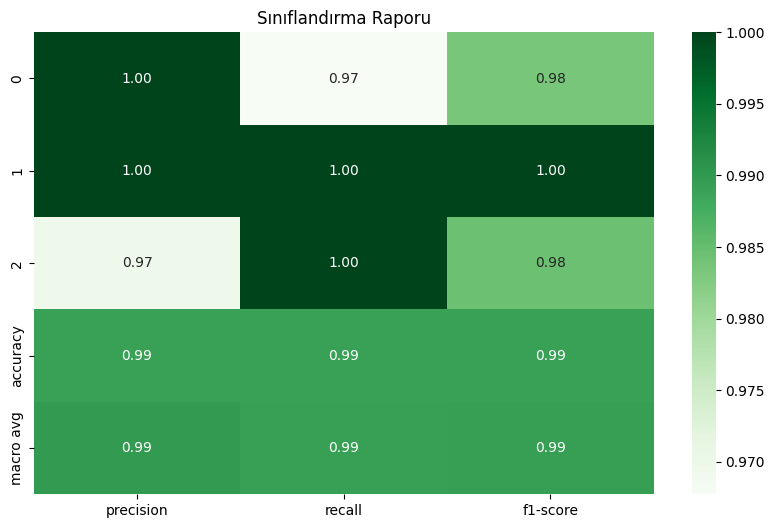

In [134]:
X_train, X_test, y_train, y_test = train_test_split(SmoteX_train, SmoteY_train, test_size=0.2, random_state=1)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()